  company                job    degree  salary_more_then_100k
0  Google    Sales Executive  Bachelor                      0
1  Google    Sales Executive    Master                      1
2  Google   Business Manager  Bachelor                      0
3  Google   Business Manager    Master                      1
4  Google  Computer Engineer  Bachelor                      1
Encoded inputs:
     company_n  job_n  degree_n
0           2      2         0
1           2      2         1
2           2      0         0
3           2      0         1
4           2      1         0
5           2      1         1
6           0      2         0
7           0      2         1
8           0      0         0
9           0      0         1
10          0      1         0
11          0      1         1
12          1      2         0
13          1      2         1
14          1      0         0
15          1      0         1
16          1      1         0
17          1      1         1


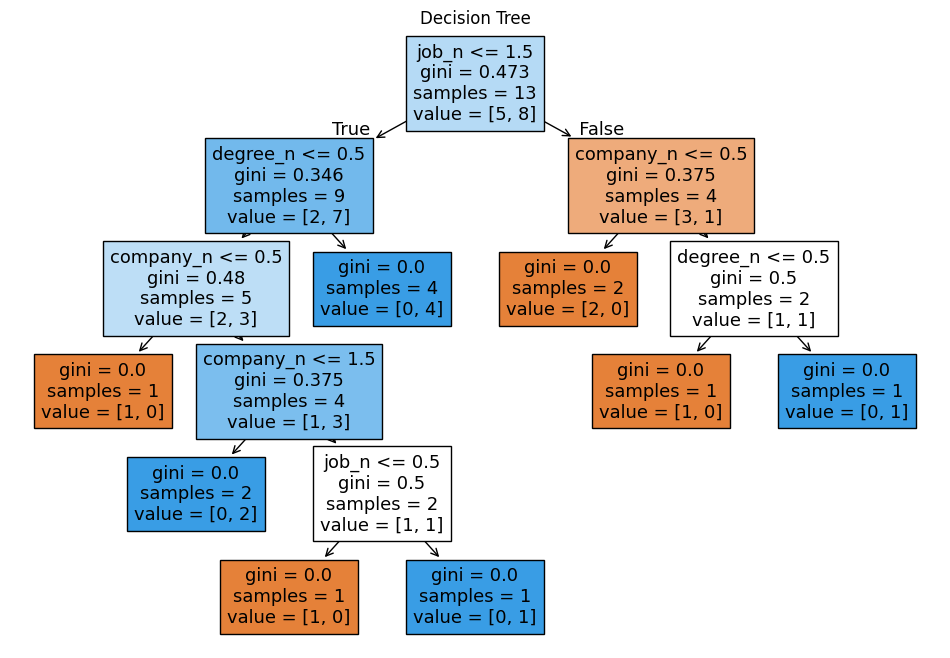

Model accuracy: 0.8
Prediction for input [2, 1, 0]: [1]


C:\Users\vignesh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("salaries.csv")
print(df.head())

# Prepare input and target
inputs = df.drop('salary_more_then_100k', axis='columns')
target = df['salary_more_then_100k']

# Label encode categorical variables
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

# Create the final input DataFrame by dropping original text columns
inputs_n = inputs.drop(['company', 'job', 'degree'], axis='columns')
print("Encoded inputs:\n", inputs_n)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(inputs_n, target, test_size=0.25, random_state=42)

# Train the decision tree model
model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)

# Plot the decision tree
plt.figure(figsize=(12,8))
features = ['company_n', 'job_n', 'degree_n']
tree.plot_tree(model, feature_names=features, filled=True)
plt.title('Decision Tree')
plt.show()

# Model evaluation
score = model.score(x_test, y_test)
print(f"Model accuracy: {score}")

# Make a prediction
prediction = model.predict([[2, 1, 0]])
print(f"Prediction for input [2, 1, 0]: {prediction}")

# Save the encoded dataframe and target to csv for inspection
inputs_n.to_csv('encoded_inputs.csv', index=False)
df.to_csv('salaries_processed.csv', index=False)
